In [1]:
#pip install WordCloud
#pip install wordcloud
# import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests

In [2]:
# creating empty reviews list 
oneplus_reviews=[]

In [3]:
for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/OnePlus-Display-Storage-4000mAH-Battery/product-reviews/B07HGJK535/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)

In [4]:
soup = bs(response.content,"html.parser")
reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)
oneplus_reviews = oneplus_reviews+ip

In [5]:
# adding the reviews of one page to empty list which in future contains all the reviews
oneplus_reviews=oneplus_reviews+ip 

In [6]:
# writng reviews in a text file 
with open("oneplus.txt","w",encoding='utf8') as output:
    output.write(str(oneplus_reviews))

In [7]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(oneplus_reviews)

In [8]:
import nltk
from nltk.corpus import stopwords

In [12]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [14]:
ip_reviews_words = ip_rev_string.split(" ")
ip_reviews_words

['',
 'update',
 'after',
 'months',
 'love',
 'this',
 'phone',
 'due',
 'to',
 'reasons',
 'awesome',
 'display',
 'extremely',
 'fast',
 'mind',
 'blowing',
 'audio',
 'playback',
 'through',
 'my',
 'jabra',
 'wireless',
 'bud',
 'many',
 'of',
 'us',
 'overlooked',
 'audio',
 'quality',
 'in',
 'a',
 'phone',
 'but',
 'i',
 'think',
 'its',
 'very',
 'useful',
 'as',
 'we',
 'also',
 'used',
 'our',
 'phone',
 'as',
 'a',
 'mp',
 'player',
 'on',
 'the',
 'go',
 'i',
 'am',
 'surprised',
 'to',
 'see',
 'the',
 'quality',
 'of',
 'high',
 'definition',
 'audio',
 'it',
 'gives',
 'when',
 'comparing',
 'to',
 'my',
 'existing',
 's',
 'and',
 's',
 'galaxy',
 'premium',
 'phones',
 'this',
 'is',
 'the',
 'best',
 'audio',
 'and',
 'best',
 'display',
 'i',
 'have',
 'seen',
 'since',
 'i',
 'use',
 'a',
 'mobile',
 'now',
 't',
 'pro',
 'available',
 'at',
 'k',
 'including',
 'k',
 'amazon',
 'offer',
 'with',
 'my',
 'hdfc',
 'card',
 'discount',
 'feels',
 'like',
 'i',
 'shou

In [15]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True,ngram_range=(1, 3))
X = vectorizer.fit_transform(ip_reviews_words)

C:\Users\User-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=['', 'update', 'after', 'months', 'love', 'this', 'phone', 'due', 'to', 'reasons', 'awesome', 'display', 'extremely', 'fast', 'mind', 'blowing', 'audio', 'playback', 'through', 'my', 'jabra', 'wireless', 'bud', 'many', 'of', 'us', 'overlooked', 'audio', 'quality', 'in', 'a', 'phone', 'but', 'i', 'think', 'its', 'very', 'useful', 'as', 'we', 'also', 'used', 'our', 'phone', 'as', 'a', 'mp', 'player', 'on', 'the', 'go', 'i', 'am', 'surprised', 'to', 'see', 'the', 'quality', 'of', 'high', 'definition', 'audio', 'it', 'gives', 'when', 'comparing', 'to', 'my', 'existing', 's', 'and', 's', 'galaxy', 'premium', 'phones', 'this', 'is', 'the', 'best', 'audio', 'and', 'best', 'display', 'i', 'have', 'seen', 'since', 'i', 'use', 'a', 'mobile', 'now', 't', 'pro', 'available', 'at', 'k', 'including', 'k', 'amazon', 'offer', 'with', 'my', 'hdfc', 'card', 'discount', 'feels', 'like', 'i', 'should', '

In [32]:
with open("C:\\Users\\User-PC\\Desktop\\Data Science\\Data Science Assignment\\10 Text Mining & Word Cloud\\stop.txt","r") as sw:
    stop_words = sw.read()
stop_words = stop_words.split("\n")
stop_words.extend(["oneplus","mobile","time","android","phone","device","screen","battery","product","good","day","price"])

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]
ip_reviews_words

['update',
 'after',
 'months',
 'love',
 'this',
 'due',
 'to',
 'reasons',
 'awesome',
 'display',
 'extremely',
 'fast',
 'mind',
 'blowing',
 'audio',
 'playback',
 'through',
 'my',
 'jabra',
 'wireless',
 'bud',
 'many',
 'of',
 'us',
 'overlooked',
 'audio',
 'quality',
 'in',
 'a',
 'but',
 'i',
 'think',
 'its',
 'very',
 'useful',
 'as',
 'we',
 'also',
 'used',
 'our',
 'as',
 'a',
 'mp',
 'player',
 'on',
 'the',
 'go',
 'i',
 'am',
 'surprised',
 'to',
 'see',
 'the',
 'quality',
 'of',
 'high',
 'definition',
 'audio',
 'it',
 'gives',
 'when',
 'comparing',
 'to',
 'my',
 'existing',
 's',
 'and',
 's',
 'galaxy',
 'premium',
 'phones',
 'this',
 'is',
 'the',
 'best',
 'audio',
 'and',
 'best',
 'display',
 'i',
 'have',
 'seen',
 'since',
 'i',
 'use',
 'a',
 'now',
 't',
 'pro',
 'available',
 'at',
 'k',
 'including',
 'k',
 'amazon',
 'offer',
 'with',
 'my',
 'hdfc',
 'card',
 'discount',
 'feels',
 'like',
 'i',
 'should',
 'have',
 'wait',
 'for',
 'another',
 'm

In [25]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)
ip_rev_string

'update after months love this due to reasons awesome display extremely fast mind blowing audio playback through my jabra wireless bud many of us overlooked audio quality in a but i think its very useful as we also used our as a mp player on the go i am surprised to see the quality of high definition audio it gives when comparing to my existing s and s galaxy premium phones this is the best audio and best display i have seen since i use a now t pro available at k including k amazon offer with my hdfc card discount feels like i should have wait for another months to get it k cheaper i paid k just for pro i believe pro and t pro was the last best phones offered by when quality and specifications concerned this is my personal experience i am sharing after days of purchase the got hanged during call and the system didn t work for half an hour not even power and reboot button the problem recurred after week after investing this big amount for a this kind of experience really gets you into t

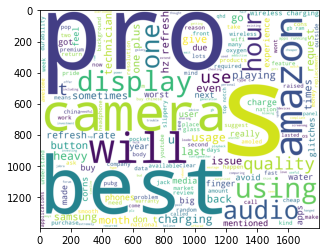

In [26]:
# WordCloud from the string.
# Corpus level word cloud

wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [44]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [46]:
poswords

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

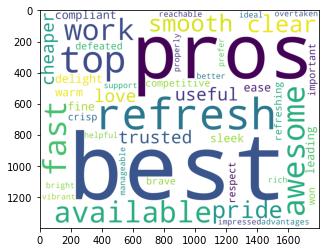

In [47]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [48]:
# negative words Choose path for -ve words stored in system
with open("negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

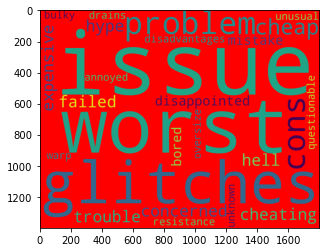

In [50]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='red',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)